In [7]:
import pandas as pd
import re
from collections import defaultdict
from collections import Counter
import seaborn as sns

In [2]:
dil=defaultdict(str)
with open("C:/Users/nwntas/genomic_TAIR10.txt") as f:
    line=1
    while line:
        line=f.readline().strip()
        if ">" in line:
            name=line[1:line.index("|")-1]
            continue
        dil[name]+=line

In [148]:
filt_seqs=dict(filter(lambda x: x[0] in dic.keys(),dil.items()))

In [192]:
dic_filt={}
for i in filt:
    if not i[3] in dic_filt.keys():
        dic_filt[i[3]]=[]
    dic_filt[i[3]]=[i[1],i[2]]
    

In [193]:
sites={}
for k,v in mta_GMUCT.items():
    if k+".1" in dic.keys() and k+".1" in filt_seqs.keys():
        sites[k]=""
        search_int=v[dic[k+".1"][0][1]-dic_filt[k+".1"][0]:(dic[k+".1"][0][2]+1)-dic_filt[k+".1"][1]]
        if len(search_int):
            sites[k]=filt_seqs[k+".1"][search_int.argmax(axis=0)-7:search_int.argmax(axis=0)+8]

In [196]:
sites=dict(filter(lambda x: x[1]!="",sites.items()))

In [200]:
with open("C:/Users/nwntas/fast.fa","w") as f:
    for k,v in sites.items():
        f.write(f">{k}\n{v}\n")

In [ ]:
##Using Streme using default parameters i manage to find three de novo motifs that appear to be DE

In [5]:
df=pd.read_excel("C:/Users/nwntas/Downloads/1-s2.0-S2211124718315961-mmc2.xls",skiprows=[1])

In [8]:
df2=pd.read_excel("C:/Users/nwntas/Enriched transcripts.xlsx", skiprows=[0])

In [10]:
enriched=df2[df2["Log ratio mock"]>1]["geneID"].to_list()

In [11]:
with open("C:/Users/nwntas/cDNA_TAIR10.txt") as f:
    seqs=[line.strip() for line in f if ">" in line]

In [105]:
GMUCT["AT1G08370"].index(max(GMUCT["AT1G08370"]))

2280

In [9]:
def bed(seq):
    m=re.findall(r"([ATM]{2}\dG\d{5}\.\d+)|(chr\d)\:(\d+)-(\d+)|(REVERSE)|(FORWARD)",seq)
    data=list(map(lambda x: list(filter(lambda y: y!="", x)), m))
    if len(data)==3:
        data=list(map(lambda x: "+" if x[0]=="FORWARD" else ("-" if x[0]=="REVERSE" else x),data))
        #return f"{'C'+data[1][0][1:]}\t{int(data[1][1])}\t{int(data[1][2])}\t{data[0][0]}\t1\t{data[2]}\n"
        return [f"{'C'+data[1][0][1:]}",int(data[1][1]),int(data[1][2]),data[0][0],data[2]]

In [12]:
beds=[bed(i) for i in seqs]
beds=list(filter(lambda x:x!=None,beds))
filt=list(filter(lambda x: x[3][:-2] in enriched, beds))

In [104]:
list(filter(lambda x: x[3]=="AT1G08370.1",filt))[0][2]-list(filter(lambda x: x[3]=="AT1G08370.1",filt))[0][1]

2373

In [ ]:
#Useful info for numbers of genes examined// Following numbers have to do with mock enriched

456/2787 #Total mapped m6A transcripts / #Total PB enriched transcripts 
#460 differentially expressed in mta/Col-0 
#46 genes expressed more in Col-0 
#57 out of 167 have a m6A site

#322 genes with m6A sites
#90 genes with m6A sites which are differentially expressed in mta/ Col-0
#So 57/90 genes that have m6A sites AND are differentially expressed are more abundant in Col-0 vs mta

In [118]:
len(df3[(df3["Unnamed: 0"].isin(enriched)) & (df3["padj"]<0.05) & (df3["log2FoldChange"]<0) &(df3["Unnamed: 0"].isin(enr))])

46

In [287]:
from scipy.stats import hypergeom

hypergeom.sf(57-1, 460, 90, 167)

5.212327722307285e-09

In [16]:
dic=defaultdict(list)
def overlap(seq):
    seq=seq.to_list()
    choices=list(filter(lambda y:y[0]==seq[0] and y[4]==seq[3],filt))
    for choice in choices:
        if choice[1]<=seq[1] and seq[2]<=choice[2]:
            dic[choice[3]].append(seq)

In [17]:
df.apply(lambda x: overlap(x),axis = 1)

0       None
1       None
2       None
3       None
4       None
        ... 
5491    None
5492    None
5493    None
5494    None
5495    None
Length: 5496, dtype: object

In [16]:
with open("C:/Users/nwntas/CDS_TAIR10.txt") as f:
    headers=[line for line in f if ">" in line]

In [26]:
cds=[bed(i) for i in headers]
cds=list(filter(lambda x:x!=None,cds))

In [31]:
cds_lims=list(filter(lambda x: x[3] in dic.keys(), cds))

In [32]:
cd={i[3]:[i[1],i[2]] for i in cds_lims}

In [34]:
m_pos={k:[[v[0][1],v[0][2],v[0][3]]] if len(v)==1 else [[j[1],j[2],j[3]] for j in v] for k,v in dic.items()}

In [35]:
m_pos

{'AT1G08370.1': [[2640454, 2640532, '+']],
 'AT1G08465.1': [[2679439, 2679554, '+'], [2679700, 2679752, '+']],
 'AT1G09850.1': [[3203949, 3204087, '+']],
 'AT1G10030.1': [[3275732, 3275829, '+']],
 'AT1G11905.1': [[4016432, 4016498, '+']],
 'AT1G12350.1': [[4200656, 4200788, '+']],
 'AT1G18600.1': [[6402642, 6402708, '+']],
 'AT1G22070.1': [[7791873, 7791944, '+'], [7791959, 7792027, '+']],
 'AT1G29952.1': [[10494402, 10494519, '+']],
 'AT1G31970.1': [[11482783, 11482854, '+']],
 'AT1G33470.1': [[12146994, 12147056, '+'], [12147104, 12147161, '+']],
 'AT1G33470.2': [[12146994, 12147056, '+'], [12147104, 12147161, '+']],
 'AT1G35460.1': [[13041908, 13042090, '+']],
 'AT1G44960.1': [[17001597, 17001696, '+']],
 'AT1G45050.1': [[17033019, 17033167, '+']],
 'AT1G47330.1': [[17353778, 17353852, '+']],
 'AT1G49740.1': [[18409590, 18409649, '+']],
 'AT1G50370.1': [[18661828, 18661947, '+']],
 'AT1G51600.1': [[19135337, 19135438, '+']],
 'AT1G51600.2': [[19135337, 19135438, '+']],
 'AT1G53920.

In [36]:
div=defaultdict(list)
for k,v in m_pos.items():
    for out in v:
        if out[2]=="+":
            if out[1]<cd[k][0]:
                div[k].append("5' UTR")
            elif out[0]<cd[k][0] and  cd[k][0]<out[1]<cd[k][1]:
                div[k].append("start")
            elif cd[k][0]<out[0]<cd[k][1] and  cd[k][0]<out[1]<cd[k][1]:
                div[k].append('CDS')
            elif cd[k][0]<out[0]<cd[k][1] and  out[1]>cd[k][1]:
                div[k].append('stop')
            else:
                div[k].append("3' UTR")

        if out[2]=="-":
            if out[0]>cd[k][1]:
                div[k].append("5' UTR")
            elif out[1]<cd[k][1] and  cd[k][1]<out[0]<cd[k][0]:
                div[k].append("start")
            elif cd[k][0]<out[0]<cd[k][1] and  cd[k][0]<out[1]<cd[k][1]:
                div[k].append('CDS')
            elif cd[k][0]<out[1]<cd[k][1] and  out[0]<cd[k][0]:
                div[k].append('stop')
            else:
                div[k].append("3' UTR")

In [37]:
div

defaultdict(list,
            {'AT1G08370.1': ["3' UTR"],
             'AT1G08465.1': ["3' UTR", "3' UTR"],
             'AT1G09850.1': ["3' UTR"],
             'AT1G10030.1': ["3' UTR"],
             'AT1G11905.1': ["3' UTR"],
             'AT1G12350.1': ["3' UTR"],
             'AT1G18600.1': ["3' UTR"],
             'AT1G22070.1': ["3' UTR", "3' UTR"],
             'AT1G29952.1': ["3' UTR"],
             'AT1G31970.1': ["3' UTR"],
             'AT1G33470.1': ["3' UTR", "3' UTR"],
             'AT1G33470.2': ["3' UTR", "3' UTR"],
             'AT1G35460.1': ["3' UTR"],
             'AT1G44960.1': ["3' UTR"],
             'AT1G45050.1': ["3' UTR"],
             'AT1G47330.1': ["3' UTR"],
             'AT1G49740.1': ["3' UTR"],
             'AT1G50370.1': ["3' UTR"],
             'AT1G51600.1': ["3' UTR"],
             'AT1G51600.2': ["3' UTR"],
             'AT1G53920.1': ['CDS'],
             'AT1G54210.1': ["3' UTR"],
             'AT1G54210.2': ["3' UTR"],
             'AT1G62040.1

In [38]:
final=Counter([j for i in div.values() for j in i])
final=dict(map(lambda x: (x[0],x[1]/sum(final.values())*100),final.items()))

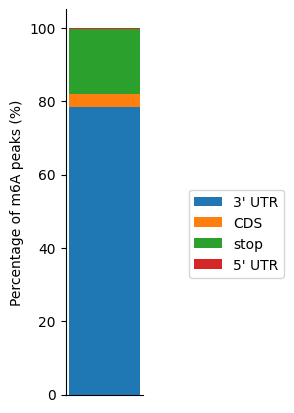

In [39]:
#I need to make this a little bit more presentable
import matplotlib.pyplot as plt

items=list(final.items())
  
fig, ax = plt.subplots(figsize=(1,5))

for k,i in items:
    if  items.index((k,i))==0:
        ax.bar(0,i,0.1,label=k)
        prev=i
        continue
    ax.bar(0,i, 0.1, label=k, bottom=prev)
    prev+=i
ax.set_ylabel('Percentage of m6A peaks (%)')
ax.set_xticks([])
ax.legend(bbox_to_anchor=(1.5,0.55))
sns.despine()

#plt.show()


In [40]:
df3=pd.read_excel("C:/Users/nwntas/Downloads/1-s2.0-S2211124718315961-mmc4.xlsx")

C:\Users\nwntas\miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [57]:
df3

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,AT1G01010,120.776678,-0.027664,0.187821,-0.147290,0.882903,0.942310
1,AT1G01020,66.685449,0.449074,0.188056,2.387976,0.016941,0.063560
2,AT1G01030,87.272516,1.046006,0.214032,4.887146,0.000001,0.000017
3,AT1G01040,521.812997,0.143427,0.246647,0.581506,0.560900,0.731306
4,AT1G01050,531.537306,-0.195468,0.116793,-1.673637,0.094202,0.231626
...,...,...,...,...,...,...,...
20836,ATMG01320,2.050869,0.738837,0.528811,1.397167,0.162363,0.335779
20837,ATMG01330,26.267811,-0.426670,0.350452,-1.217485,0.223420,0.414040
20838,ATMG01360,17.545480,-0.290873,0.331662,-0.877015,0.380478,0.581485
20839,ATMG01370,6.391928,-1.539700,0.473462,-3.252001,0.001146,0.007422


In [95]:
#Checking for differential expression under the existence of m6A peaks inside the sequence

In [41]:
enr=list(map(lambda x: x[:-2],filter(lambda x: x[-2:]==".1", dic.keys())))

LogFC=df3[(df3["Unnamed: 0"].isin(enriched)) & (df3["padj"]<0.05) & (df3['Unnamed: 0'].isin(enr))].set_index('Unnamed: 0').to_dict()['log2FoldChange']
LogFC_not=df3[(df3["Unnamed: 0"].isin(enriched)) & (df3["padj"]<0.05) & (~df3['Unnamed: 0'].isin(enr))].set_index('Unnamed: 0').to_dict()['log2FoldChange']

Text(0, 0.5, 'Log2(mta/Col-0)')

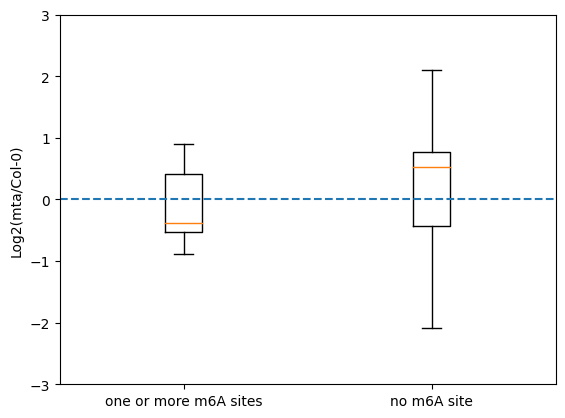

In [65]:
fig, ax=plt.subplots()
ax.boxplot([list(LogFC.values()),list(LogFC_not.values())],showfliers=False)
ax.axhline(0,linestyle="--")
ax.set_ylim([-3,3])
ax.set_xticklabels(["one or more m6A sites", "no m6A site"])
ax.set_ylabel("Log2(mta/Col-0)")

In [103]:
#Statistical significance between the difference of the distribution of the two conditions// Subset of 384 genes from 699
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(list(LogFC.values()), list(LogFC_not.values()), alternative="less")

In [104]:
#Statistically significant difference in the shape of the distributions
stat,p_value

(9111.0, 1.1339256997314643e-07)

(array([ 7., 15., 17.,  7.,  0.,  0.,  4., 15.,  7.,  4.]),
 array([-0.88250804, -0.70352596, -0.52454387, -0.34556178, -0.1665797 ,
         0.01240239,  0.19138448,  0.37036656,  0.54934865,  0.72833073,
         0.90731282]),
 <BarContainer object of 10 artists>)

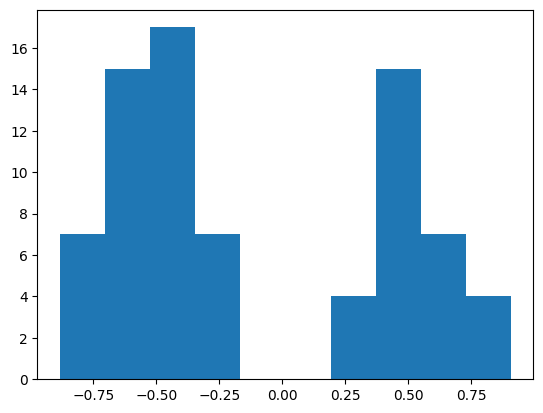

In [105]:
plt.hist(list(LogFC.values()))

In [106]:
import scipy.stats as stats

((array([-2.36238474, -2.01347493, -1.81026503, -1.66233958, -1.54380857,
         -1.44369523, -1.35626543, -1.27812674, -1.20709711, -1.14168553,
         -1.08082545, -1.02372587, -0.96978277, -0.91852363, -0.86957117,
         -0.82261879, -0.77741356, -0.73374392, -0.69143083, -0.65032108,
         -0.61028225, -0.57119885, -0.53296925, -0.49550332, -0.45872051,
         -0.42254825, -0.38692072, -0.3517778 , -0.31706416, -0.28272855,
         -0.24872316, -0.21500304, -0.18152571, -0.14825065, -0.11513897,
         -0.08215309, -0.04925637, -0.01641289,  0.01641289,  0.04925637,
          0.08215309,  0.11513897,  0.14825065,  0.18152571,  0.21500304,
          0.24872316,  0.28272855,  0.31706416,  0.3517778 ,  0.38692072,
          0.42254825,  0.45872051,  0.49550332,  0.53296925,  0.57119885,
          0.61028225,  0.65032108,  0.69143083,  0.73374392,  0.77741356,
          0.82261879,  0.86957117,  0.91852363,  0.96978277,  1.02372587,
          1.08082545,  1.14168553,  1.

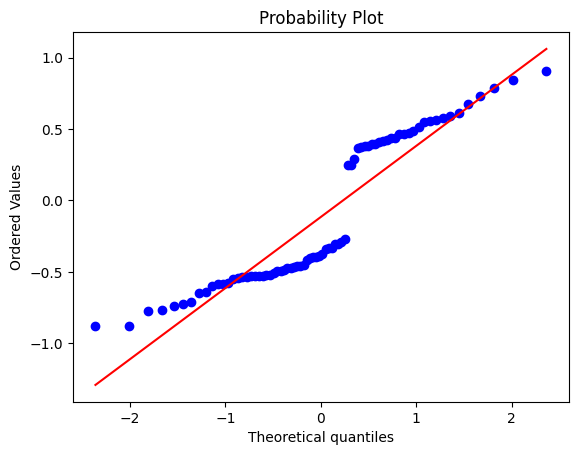

In [107]:
##QQ-plot to check for normally distributed
stats.probplot(list(LogFC.values()), dist="norm", plot=plt)

In [108]:
#Control bins
_,bins=pd.qcut(list(LogFC_not.values()), [0, .25, .5, .75, 1.],retbins=True)

In [109]:
bins

array([-2.09148395, -0.43119379,  0.53408934,  0.77273549,  2.78251908])

In [110]:
#Finding the observed frequency of items in each bin for mock and treat groups ie m6A peak existence or not
observed_treat=pd.cut(list(LogFC.values()), bins=bins).value_counts().values
observed_mock=pd.cut(list(LogFC_not.values()), bins=bins).value_counts().values

In [111]:
expected_treat=observed_mock/sum(observed_mock)*sum(observed_treat)

In [112]:
#Statistically significant difference in the distributions // ref: https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf
from scipy.stats import chisquare
chisquare(observed_treat,expected_treat)

Power_divergenceResult(statistic=39.35476829409049, pvalue=1.4598288291741892e-08)

In [33]:
#Calculating the relative stability of transcripts containing or not m6A peaks in their sequence

In [79]:
with open(r"C:\Users\nwntas\GSE116333_ctrl_rep1and2_gmuct.unspliced.bed12") as f:
    s=[i for i in f if "_1" in i] 
    #GMUCT={i.split("\t")[4]:sum(list(map(lambda x: float(x), i.split("\t")[12].split(",")))) for i in s}
    GMUCT={i.split("\t")[4]:list(map(lambda x: float(x), i.split("\t")[12].split(","))) for i in s}

In [3]:
import numpy as np

In [115]:
with open(r"C:\Users\nwntas\GSE108766_MTA_DMSO_merged_GMUCT.5primeend.bed12.txt") as f:
    s=[i for i in f if "_1" in i] 
    mta_GMUCT={i.split("\t")[4]:list(map(lambda x: float(x), i.split("\t")[12].split(","))) for i in s}

In [116]:
total_reads=sum([i for j in mta_GMUCT.values() for i in j])
#mta_GMUCT={k:sum((np.array(v)/total_reads)*1_000_000) for k,v in mta_GMUCT.items()}
mta_GMUCT={k:np.array(v)/total_reads*1_000_000 for k,v in mta_GMUCT.items()}

In [6]:
#Calculation of the cpm counts using one replicate per condition is relevant due to high reproducibility of the 
#experimental replicates as stated in the paper

with open(r"C:\Users\nwntas\GSM2913047_col0_rep1_polyA.filtered.htseq_counts.txt") as f:
    counts={i.strip().split("\t")[0]:round(float(i.strip().split("\t")[1])) for i in f}

cpms={k:(v/sum(counts.values())*1_000_000) for k,v in counts.items()}

In [7]:
with open(r"C:\Users\nwntas\GSM2913051_mta_rep1_polyA.filtered.htseq_counts.txt") as f:
    mta_counts={i.strip().split("\t")[0]:round(float(i.strip().split("\t")[1])) for i in f}

mta_cpms={k:(v/sum(mta_counts.values())*1_000_000) for k,v in mta_counts.items()}

In [ ]:
#Here i calculate the log2(GMUCT/RNAseq) stability measure for transcripts that have m6A sites in their sequence

In [31]:
a=dict(filter(lambda x: x[0] in map(lambda x: x[:-2],dic.keys()),GMUCT.items()))

In [40]:
c=dict(filter(lambda x: x[0] in map(lambda x: x[:-2],dic.keys()),mta_GMUCT.items()))

In [32]:
b=dict(filter(lambda x: x[0] in map(lambda x: x[:-2],dic.keys()),cpms.items()))

In [47]:
d=dict(filter(lambda x: x[0] in c.keys(),mta_cpms.items()))

In [36]:
logs_col=np.log2(np.array(list(a.values()))/np.array(list(b.values())))

In [50]:
logs_mta=np.log2(np.array(list(c.values())[:-1])/np.array(list(d.values())))

In [52]:
import matplotlib.pyplot as plt

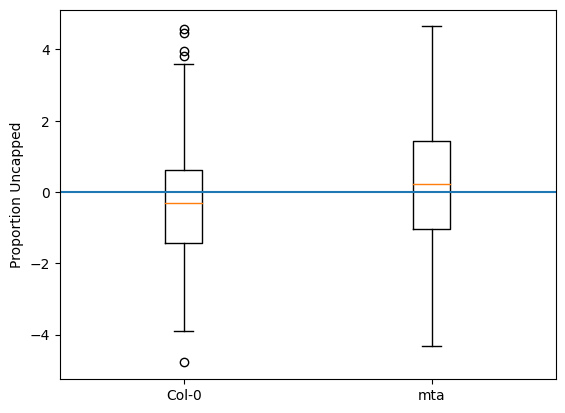

In [55]:
fig, ax=plt.subplots()

ax.boxplot([logs_col,logs_mta])
ax.set_xticklabels(["Col-0","mta"])
ax.set_ylabel("Proportion Uncapped")
#ax.set_ylim([-5,21])
ax.axhline(y=0)

In [75]:
from scipy.stats import shapiro, ttest_ind

In [76]:
#So there is a statistically significant difference in means between the two groups
ttest_ind(logs_col,logs_mta)

Ttest_indResult(statistic=-3.699519609870062, pvalue=0.00023856354095863326)

In [16]:
newl=dict(map(lambda x: (x[0].replace(".","_"),x[1]),filter(lambda x: ".1" in x[0],dic.items())))

In [20]:
Cleav={i[4]:[i[12].split(',')[j[1]-int(i[1]):j[1]-int(i[1])+j[2]-j[1]+1] for j in newl[i[3]]] for i in list(filter(lambda x: x[3] in newl.keys(),s))}

In [188]:
Cleav={k:[np.mean(list(map(lambda x:float(x),j)))for j in v] for k,v in Cleav.items()}

In [191]:
Cleav_mta={i[4]:[i[12].split(',')[j[1]-int(i[1]):j[1]-int(i[1])+j[2]-j[1]+1] for j in newl[i[3]]] for i in list(filter(lambda x: x[3] in newl.keys(),s))}

In [194]:
Cleav_mta={k:[np.mean(list(map(lambda x:float(x),j)))for j in v] for k,v in Cleav_mta.items()}

In [205]:
cl_vals=[j for i in Cleav.values() for j in i] #Cleavage score here is considered the mean cleavage within the m6A site 

In [207]:
mcl_vals=[j for i in Cleav_mta.values() for j in i]

In [ ]:
#NEW ANALYSIS

In [6]:
vir1_VIRc_df

,#chrom,start,end,name,score,strand,log_odds,hetero_g_stat,neg_log10_hetero_p_val,neg_log10_hetero_fdr,homo_g_stat_a,homo_g_p_val_a,homo_g_stat_b,homo_g_p_val_b
0,1,31295,31296,DER_site,2.0,-,1.54,23.85,4.57,1.78,3.54,0.74,3.78,0.93
1,1,45417,45418,DER_site,13.0,-,2.21,81.91,16.92,13.35,15.03,0.09,10.29,0.33
2,1,45463,45464,DER_site,8.0,-,2.08,61.00,11.75,8.41,7.35,0.60,6.82,0.87
3,1,47576,47577,DER_site,11.0,-,1.97,75.01,14.70,11.23,7.10,0.31,12.45,0.41
4,1,47577,47578,DER_site,25.0,-,2.60,141.64,28.90,25.00,7.23,0.30,8.99,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21011,5,26959519,26959520,DER_site,5.0,+,2.35,46.00,8.61,5.46,5.75,0.77,9.65,0.65
21012,5,26959520,26959521,DER_site,2.0,+,1.83,27.40,4.78,1.97,6.54,0.69,5.32,0.95
21013,5,26959521,26959522,DER_site,6.0,+,2.66,48.02,9.68,6.45,8.23,0.22,7.53,0.58
21014,5,26959647,26959648,DER_site,4.0,-,2.86,37.38,7.42,4.35,9.06,0.17,4.74,0.86


In [4]:
vir1_VIRc_df=pd.read_table(r"C:\Users\nwntas\Downloads\elife-49658-fig5-data1-v1.tds")

In [13]:
filt=list(filter(lambda x: x[3][:-2] in df2[df2["Log ratio mock"]>1]["geneID"].to_list(), beds))

In [27]:
cds_lims={i[3]:[i[1],i[2]]for i in cds}

In [28]:
ls=[]
def find_enriched(row):
    global ls
    choices=list(filter(lambda x: int(row[0])==int(x[0][-1:]) and row[5]==x[4],beds))
    if choices:
        for choice in choices:
            if choice[1]<=row[1] and row[2]<=choice[2]:
                ls+=[{"Gene":choice[3],"#chr":row[0],"start":row[1],"end":row[2],"score":row[4],"strand":row[5],"LogFC":row[6]}]
    else:
        print(":(")

In [41]:
enriched_sites["Methylated?"]=enriched_sites.apply(lambda x: "YES" if x["LogFC"]>=1 else "NO",axis=1)

In [47]:
list(filter(lambda x: x[3][:-2]=='AT1G04820', cds))

[['Chr1', 1356421, 1358266, 'AT1G04820.1', '-']]

In [53]:
enriched_sites[enriched_sites["Gene"]=='AT1G04820.1']

,Gene,#chr,start,end,score,strand,LogFC,Methylated?
597,AT1G04820.1,1,1356307,1356308,14.0,-,1.75,YES
598,AT1G04820.1,1,1356313,1356314,26.0,-,1.60,YES
599,AT1G04820.1,1,1356314,1356315,13.0,-,2.16,YES
600,AT1G04820.1,1,1356316,1356317,5.0,-,1.01,YES
601,AT1G04820.1,1,1356345,1356346,2.0,-,0.84,NO
602,AT1G04820.1,1,1356346,1356347,9.0,-,1.09,YES
603,AT1G04820.1,1,1356347,1356348,28.0,-,1.50,YES
604,AT1G04820.1,1,1356400,1356401,3.0,-,-0.18,NO
605,AT1G04820.1,1,1356401,1356402,4.0,-,-0.89,NO
606,AT1G04820.1,1,1356402,1356403,6.0,-,0.93,NO


In [49]:
vir1_VIRc_df[(vir1_VIRc_df["start"]>=1356421)&(vir1_VIRc_df["end"]<=1358266)]

,#chrom,start,end,name,score,strand,log_odds,hetero_g_stat,neg_log10_hetero_p_val,neg_log10_hetero_fdr,homo_g_stat_a,homo_g_p_val_a,homo_g_stat_b,homo_g_p_val_b
8787,3,1358103,1358104,DER_site,2.0,+,1.05,25.71,4.44,1.67,14.45,0.27,7.60,0.58
8788,3,1358104,1358105,DER_site,6.0,+,2.03,49.81,9.40,6.20,11.57,0.48,13.98,0.30
8789,3,1358105,1358106,DER_site,9.0,+,2.73,62.42,12.75,9.36,10.59,0.30,7.45,0.28


In [52]:
enriched_sites.to_excel("m6A sites.xlsx",index=False)

In [29]:
vir1_VIRc_df.apply(lambda x: find_enriched(x),axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
21011    None
21012    None
21013    None
21014    None
21015    None
Length: 21016, dtype: object

In [32]:
enriched_sites=pd.DataFrame.from_records(ls)

#enriched_sites=enriched_sites[enriched_sites["Gene"].str.contains(".1",regex=False)]

In [178]:
heat_enriched_sites=pd.DataFrame.from_records(ls)

heat_enriched_sites=heat_enriched_sites[heat_enriched_sites["Gene"].str.contains(".1",regex=False)]

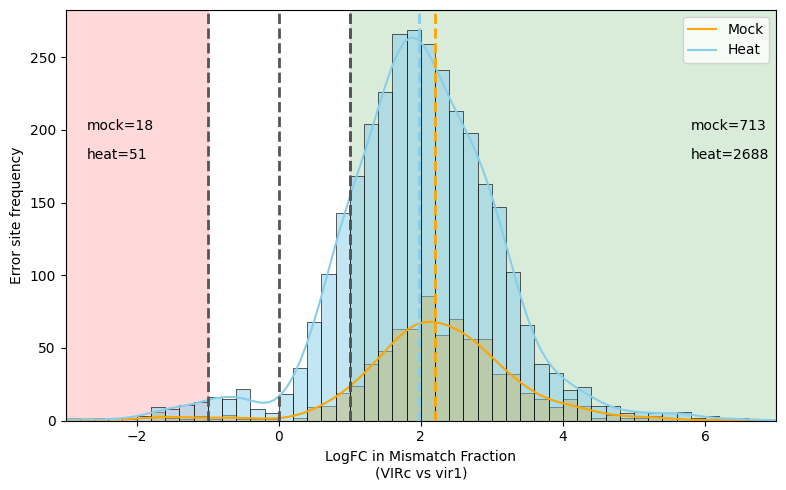

In [300]:
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot([heat_enriched_sites["LogFC"].to_list(),enriched_sites["LogFC"].to_list()], 
             bins=np.linspace(-3, 7, 51),palette=["#87CEEB","#FFA500"],kde=True)

ax.axvline(-1, ls='--', color='#555555', lw=2)
ax.axvline(0, ls='--', color='#555555', lw=2)
ax.axvline(1, ls='--', color='#555555', lw=2)

ax.axvline(np.median(enriched_sites["LogFC"].to_list()), ls='--', color='#FFA500', lw=2)
ax.axvline(np.median(heat_enriched_sites["LogFC"].to_list()), ls='--', color='#87CEEB', lw=2)
ax.axvline(1, ls='--', color='#555555', lw=2)

ax.axvspan(-1, -3, alpha=0.15, zorder=-1,color="red")
ax.axvspan(1, 7, alpha=0.15, zorder=-1,color="green")
ax.set_xlim(-3, 7)

ax.annotate(text=f'mock={sum(enriched_sites["LogFC"].to_numpy() < -1)}', xy=(-2.7, 200))
ax.annotate(text=f'heat={sum(heat_enriched_sites["LogFC"].to_numpy() < -1)}', xy=(-2.7, 180))

ax.annotate(text=f'mock={sum(enriched_sites["LogFC"].to_numpy() > 1)}', xy=(5.8, 200))
ax.annotate(text=f'heat={sum(heat_enriched_sites["LogFC"].to_numpy() > 1)}', xy=(5.8, 180))
ax.set_xlabel('LogFC in Mismatch Fraction\n(VIRc vs vir1)')
ax.set_ylabel('Error site frequency')
plt.tight_layout()
ax.legend(labels=["Heat","Mock"][::-1],loc=1)
plt.savefig('fder_site_effect_size_histogram.tiff')

plt.show()

In [121]:
from scipy import stats

In [125]:
stats.mannwhitneyu(heat_enriched_sites["LogFC"].to_list(),enriched_sites["LogFC"].to_list(),alternative="less")

MannwhitneyuResult(statistic=2062246.5, pvalue=2.7923325479342835e-20)

In [274]:
ls=[]
def find_where(row):
    global ls
    choices=list(filter(lambda x: row[0]==x[0],cds_lims.items()))
    if choices:
        for choice in choices:
            if row[5]=="+":
                if row[3]<choice[1][0]:
                    ls+=["5' UTR"]
                elif choice[1][0]<row[2]<choice[1][1] and  choice[1][0]<row[3]<choice[1][1]:
                    ls+=['CDS']
                else:
                    ls+=["3' UTR"]

            if row[5]=="-":
                if row[2]>choice[1][1]:
                    ls+=["5' UTR"]
                elif choice[1][0]<row[2]<choice[1][1] and  choice[1][0]<row[3]<choice[1][1]:
                    ls+=['CDS']
                else:
                    ls+=["3' UTR"]
    else:
        print(row[0])

In [345]:
enriched_sites[enriched_sites["LogFC"]>1].apply(lambda x: find_where(x),axis=1)

AT3G06125.1


0       None
1       None
3       None
4       None
5       None
        ... 
1030    None
1031    None
1033    None
1035    None
1036    None
Length: 713, dtype: object

In [346]:
final=Counter(ls)
final=dict(map(lambda x: (x[0],x[1]/sum(final.values())*100),final.items()))

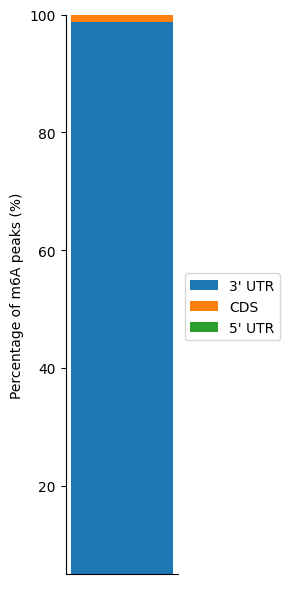

In [347]:
%matplotlib inline

import matplotlib.pyplot as plt

items=list(final.items())
  
fig, ax = plt.subplots(figsize=(3,6))

for k,i in items:
    if  items.index((k,i))==0:
        ax.bar(0,i,0.4,label=k)
        prev=i
        continue
    ax.bar(0,i, 0.4, label=k, bottom=prev)
    prev+=i
ax.set_ylabel('Percentage of m6A peaks (%)')
ax.set_xticks([])
ax.set_ylim([5,100])
ax.legend(bbox_to_anchor=(1,0.55))
sns.despine()

plt.tight_layout()
plt.savefig("mock_location_m6a_sites.tiff")


In [244]:
vir_diff=pd.read_excel(r"C:\Users\nwntas\Downloads\elife-49658-fig6-data1-v1.xlsx")

In [246]:
vir_diff["gene_id"]=vir_diff["gene_id"].apply(lambda x: x+".1")

In [264]:
not_menr=set(map(lambda x: x+".1",df2[(df2["Log ratio mock"]>1)]["geneID"].to_list()))-set(enriched_sites["Gene"])

not_henr=set(map(lambda x: x+".1",df2[(df2["Log ratio heat"]>1)]["geneID"].to_list()))-set(heat_enriched_sites["Gene"])

In [282]:
m6a_yes=vir_diff[vir_diff["gene_id"].isin(enriched_sites["Gene"].to_list())]["logFC"].to_list()

m6a_no=vir_diff[vir_diff["gene_id"].isin(not_menr)]["logFC"].to_list()



m6a_yes_h=vir_diff[vir_diff["gene_id"].isin(heat_enriched_sites["Gene"].to_list())&(vir_diff["FDR"]<0.05)]["logFC"].to_list()

m6a_no_h=vir_diff[vir_diff["gene_id"].isin(not_henr)&(vir_diff["FDR"]<0.05)]["logFC"].to_list()

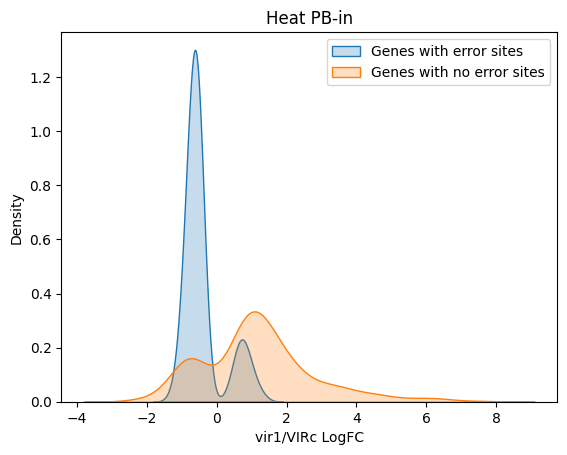

In [324]:
fig, ax=plt.subplots()
sns.kdeplot(m6a_yes_h,fill=True)
sns.kdeplot(m6a_no_h,fill=True)

ax.legend(labels=["Genes with error sites","Genes with no error sites"])
ax.set_xlabel("vir1/VIRc LogFC")
ax.set_title("Heat PB-in")

#ax.set_xlim(-2.5, 2.5)
plt.savefig("Heat_diff_exp.tiff")

In [250]:
len(enriched_sites["Gene"].to_list())

779

In [262]:
1389+277 

1666

In [290]:
len(m6a_no)

1339